# __CUSTOMER CHURN ANALYSIS PROJECT__

### Name:
Tonia Ethuakhor

### Date:
January 2025

### Project Overview:
This project focuses on understanding why customers stop using a telecommunications
service and how the business can reduce customer churn.

Using real customer data, I analysed customer behaviour, service usage, and subscription
patterns to identify the factors that increase the likelihood of churn. I also built a
machine learning model to predict which customers are most at risk of leaving, so that
the company can take action early.

### Real-World Context:
In subscription-based businesses such as telecommunications, customers can leave at any
time if they are dissatisfied or find better alternatives. Losing customers affects
revenue, growth, and long-term business sustainability.

It is widely recognised that acquiring a new customer can cost significantly more than
retaining an existing one, often estimated to be between 5 and 20 times higher. This
makes churn analysis critical to protecting the company’s revenue and long-term value.

This analysis is approached from a business and revenue perspective, with particular
emphasis on customer retention and lifetime value, reflecting real-world sales and
customer management priorities. From a management and shareholder perspective, reducing 
churn directly supports revenue stability and sustainable growth by preserving existing 
income streams and improving customer lifetime value.

### Dataset Used:
The Telco Customer Churn dataset was used for this project. 
Here is the link to the dataset: https://lnkd.in/erDSyNV7. It contains information about 
customer demographics, services subscribed to, billing details, contract types, and whether 
or not the customer churned.

### Type of Problem:
This is a supervised machine learning problem focused on binary classification,
where the goal is to predict whether a customer will churn (Yes or No).

From a business perspective, the model places greater emphasis on recall. Missing a
customer who is likely to churn is considered more costly than incorrectly flagging
a loyal customer, as it results in a lost opportunity for early retention.

## __Business Framing & Problem Definition__

### What Does Churn Mean in This Project?
In this analysis, churn refers to customers who have stopped using the company’s services
or have cancelled their subscription within a given period.

In simple terms, these are customers who have decided to leave the business.

### Why Is Churn Important?
Customer churn is a major concern for businesses because it directly affects revenue.
It is usually much more expensive to acquire new customers than to retain existing ones.

High churn reduces both current income and future value from loyal customers. It can also 
indicate deeper problems such as poor service quality, pricing issues, or customer dissatisfaction.

### Business Goal
The main goal of this project is to identify customers who are most likely to churn and
to understand the reasons behind their decision.

By identifying high-risk customers early, the business can take proactive steps such as
offering incentives, improving customer support, or adjusting service plans to encourage
customers to stay.

### How Success Is Measured
The success of this project will be evaluated based on its ability to correctly identify
customers at risk of churn before their contracts end. In particular, the model
aims to correctly flag at least 75–80% of potential churners (Recall), while keeping
false positives manageable.

## __1. Import Libraries__

In [254]:
# Load the necessary libraries

# Data handling and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test splitting and preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler  # Optional for tree models

# Machine learning model
from xgboost import XGBClassifier, plot_importance

# Model evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve)

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

## __2. Load Data__

In [255]:
# Load the dataset into a pandas DataFrame and standardise column names

#  1. LOAD THE DATASET
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn 2.csv")

#  2. STANDARDIZE COLUMNS
# Standardise column names to make them easier to work with in code
# Lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

#  3. PREVIEW THE DATASET
# Preview the first 5 rows to check the dataset loaded correctly
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## __3. Basic Structure Check__

Dataset Dimensions: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbi

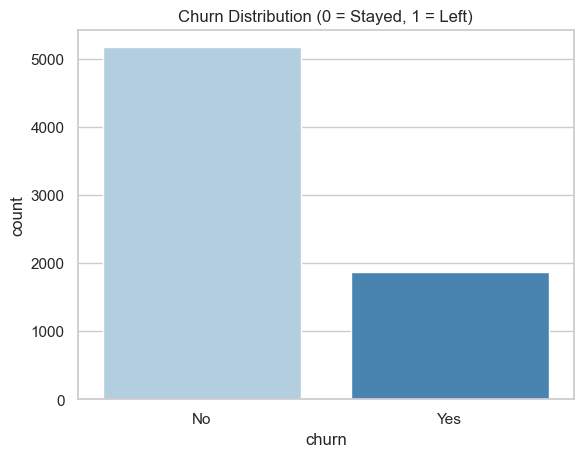

In [256]:
#  1. DATA OVERVIEW 
# Check the shape of the dataset to see how many rows (customers) and columns (features)
print(f"Dataset Dimensions: {df.shape}")

# Check data types and missing values to identify columns that may need cleaning
df.info()

# Check the type of 'totalcharges' column
# Sometimes it is stored as string due to missing or blank values
print(f"totalCharges type: {df['totalcharges'].dtype}")

#  2. STATISTICAL SUMMARY 
# Quick view of numeric columns to understand distribution, mean, min, max, and detect outliers
print(df.describe())  

#  3. CHURN VS NON-CHURN COMPARISON 
# Check the proportion of churned (1) vs non-churned (0) customers
print(df['churn'].value_counts(normalize=True))  

# Visualise the target variable to compare churn vs non-churn
sns.countplot(x='churn', data=df, palette="Blues")
plt.title('Churn Distribution (0 = Stayed, 1 = Left)')
plt.show()

# Observation on Class Imbalance:
# The dataset is imbalanced, with about 73.5% of customers staying (non-churners) and 26.5% leaving (churners). 
# This is typical for telecom churn data. 

# To make sure the model focuses on the customers who are likely to leave, performance will be measured using metrics 
# that prioritise correctly identifying churners (Recall) while also keeping overall accuracy in mind.

## __4. Data Cleaning & Preparation__

In [257]:
#  1. INITIAL QUALITY CHECK 
# General check for the whole dataset
print("Initial Missing Values:\n", df.isnull().sum())

# SPECIFIC CHECK: totalcharges
# This is done specifically because totalcharges is a high-value feature
print(f"\ntotalcharges - Pre-cleaning Check:")
print(f"Missing Count: {df['totalcharges'].isnull().sum()}")
print(f"Missing Percentage: {df['totalcharges'].isnull().mean() * 100:.2f}%")

# Extra Check: In many datasets, totalcharges has blank strings " " instead of NaN
blank_count = (df['totalcharges'] == " ").sum()
if blank_count > 0:
    print(f"Found {blank_count} blank spaces in totalcharges. Converting to NaN...")
    df['totalcharges'] = df['totalcharges'].replace(" ", np.nan).astype(float)

#  2. DATA CLEANING 
# 1. Fill numeric missing values with Median
# Use select_dtypes to ensure it only applies median to numbers
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 2. Convert Target Column (Churn) to Integer
# Mapping ensures it handles "Yes/No" or "0/1" correctly
if df['churn'].dtype == 'object':
    df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
df['churn'] = df['churn'].astype(int)

#  3. FINAL VERIFICATION 
print("\n FINAL VERIFICATION")
# Verify totalcharges missing count is now 0
print(f"totalcharges Missing Count: {df['totalcharges'].isnull().sum()}")

# Check all data types are correct
print("\nFinal Data Types:")
print(df.dtypes)

# Check class imbalance in target
print("\nchurn proportion:")
print(df['churn'].value_counts(normalize=True))

# Observation:
# totalcharges had a few missing entries which were filled with median values.
# Churn target is now numeric: 0 = Stayed, 1 = Left.
# All numeric columns are ready for modelling.
# With all numeric data cleaned and the churn column correctly prepared, the model
# can better spot customers at risk of leaving.

Initial Missing Values:
 customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

totalcharges - Pre-cleaning Check:
Missing Count: 11
Missing Percentage: 0.16%

 FINAL VERIFICATION
totalcharges Missing Count: 0

Final Data Types:
customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     

## __5. Exploratory Data Analysis (EDA)__

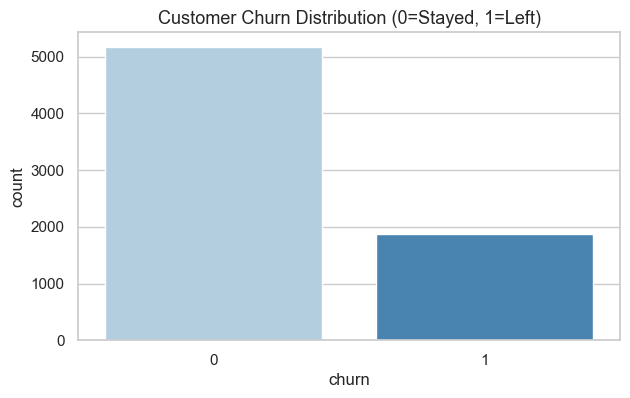

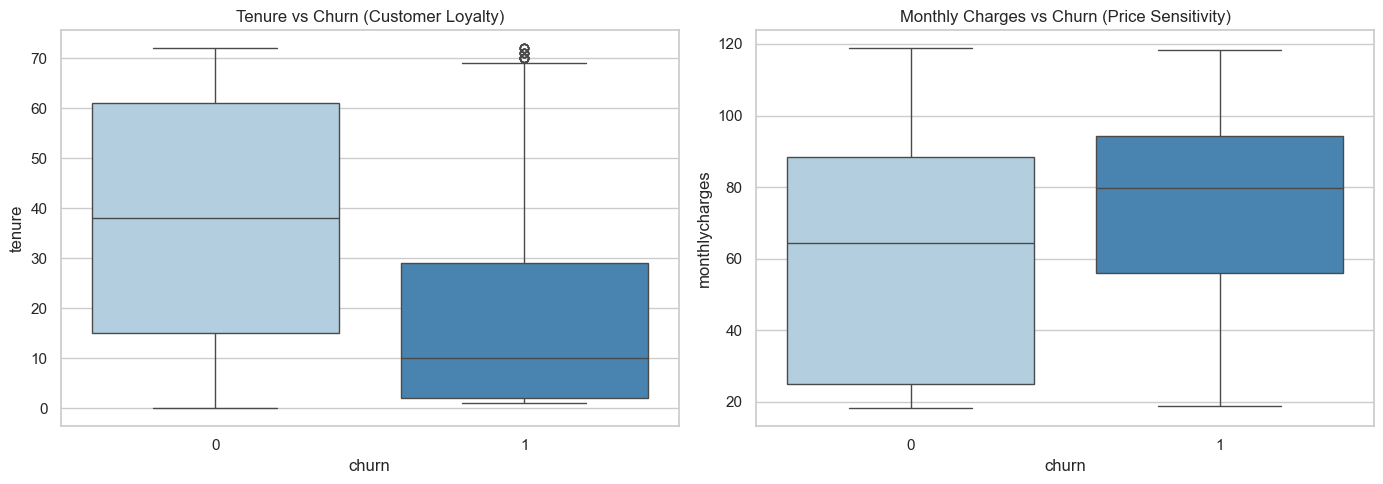

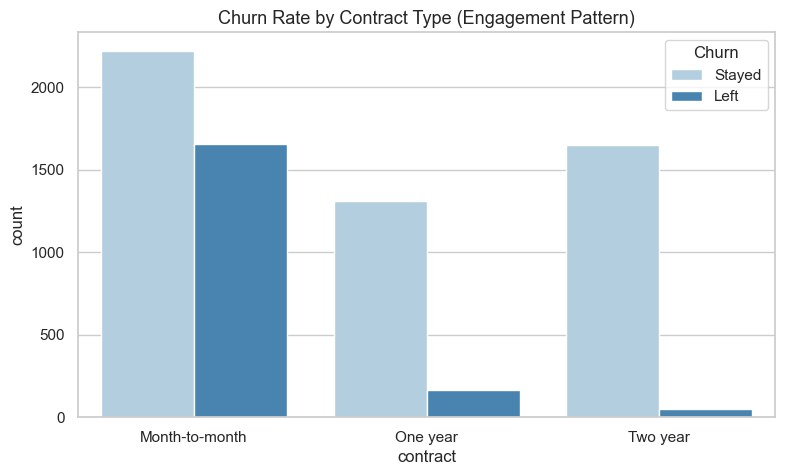

In [258]:
# Set a consistent theme for all plots
sns.set_theme(style="whitegrid")  

# 1. Churn vs Non-Churn
plt.figure(figsize=(7, 4))
sns.countplot(x='churn', data=df, palette='Blues')
plt.title("Customer Churn Distribution (0=Stayed, 1=Left)", fontsize=13)
plt.show()

# Observation: As noted earlier, the dataset is imbalanced with about 73.5% customers staying and 26.5% leaving.

# 2. Usage, Tenure, Engagement Patterns
# Create a 1x2 subplot to compare Tenure and MonthlyCharges side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot A: Tenure (Shows customer loyalty/age)
sns.boxplot(ax=axes[0], x='churn', y='tenure', data=df, palette='Blues')
axes[0].set_title("Tenure vs Churn (Customer Loyalty)")

# Plot B: Monthly Charges (Shows price sensitivity)
sns.boxplot(ax=axes[1], x='churn', y='monthlycharges', data=df, palette='Blues')
axes[1].set_title("Monthly Charges vs Churn (Price Sensitivity)")

plt.tight_layout()
plt.show()

# Engagement patterns: Contract type vs churn
plt.figure(figsize=(9, 5))
sns.countplot(x='contract', hue='churn', data=df, palette='Blues')
plt.title("Churn Rate by Contract Type (Engagement Pattern)", fontsize=13)
plt.legend(title='Churn', labels=['Stayed', 'Left'])
plt.show()

## __6. Feature Engineering__

In [259]:
#  1. BINNING: Create tenure groups
# Use -1 to capture customers with 0 tenure and np.inf to capture customers over 60 months.
# This helps the model identify different customer lifecycle stages.
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[-1, 6, 12, 24, 48, np.inf],
    labels=['New', 'Short-term', 'Mid-term', 'Long-term', 'Loyal'])

#  2. FEATURE SELECTION 
# Drop 'customerID' column as it is a unique identifier with no predictive value.
if 'customerid' in df.columns:
    df.drop('customerid', axis=1, inplace=True)

#  3. ONE-HOT ENCODING (Categorical to Numerical)
# Convert text-based categories (like 'contract', 'payment method') into numbers
# so the machine learning model can understand them.

# Identify categorical columns (excluding the target 'churn')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'churn' in categorical_cols:
    categorical_cols.remove('churn')

# Apply Get Dummies
# drop_first=True prevents "Multi-collinearity" (the Dummy Variable Trap)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#  4. VERIFICATION
print("Feature Engineering Complete")
print(f"New Shape: {df.shape}")  
print(df.head())

# Check for any unexpected nulls created during binning
if df.isnull().sum().sum() == 0:
    print("\nAll features are now numeric and there are no missing values. The dataset is ready for modelling.")
else:
    print("\n Warning: Missing values detected after Feature Engineering.")

Feature Engineering Complete
New Shape: (7043, 35)
   seniorcitizen  tenure  monthlycharges  totalcharges  churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   partner_Yes  dependents_Yes  phoneservice_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   multiplelines_No phone service  ...  contract_One year  contract_Two year  \
0                            True  ...              False              False   
1      

## __7. Data Splitting & Scaling__

In [260]:
# 1. Separate Features and Target
X = df.drop('churn', axis=1)
y = df['churn']

# 2. Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# NOTE: Scaling is not required for tree-based models like XGBoost,
# but is useful for models like Logistic Regression or KNN.

print("Data preparation complete. Training and test sets are ready.")

Data preparation complete. Training and test sets are ready.


## __8. Churn Modelling__

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



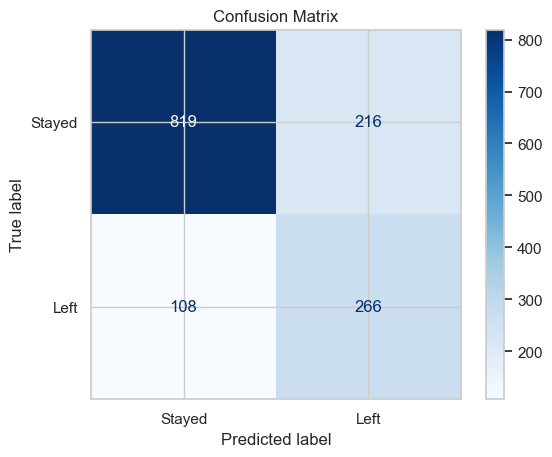

ROC-AUC Score: 0.839


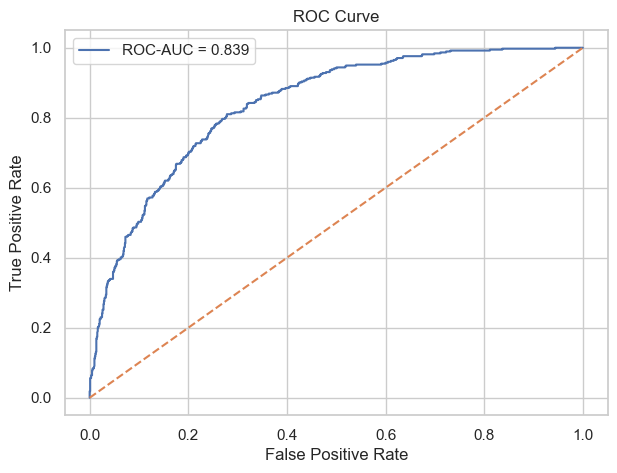

<Figure size 1000x800 with 0 Axes>

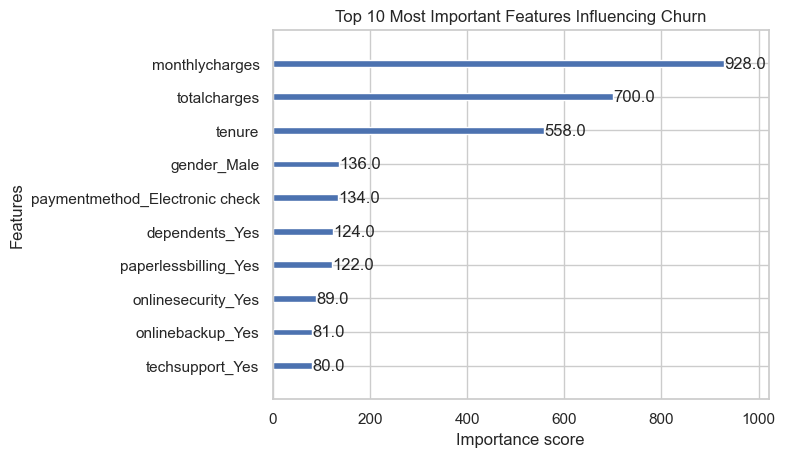

In [262]:
# In this section, a machine learning model is trained to predict
# whether a customer is likely to churn (leave) or remain with the company.

# XGBoost is used because it performs very well on structured business data
# and can capture complex relationships between customer behaviour and churn.

# 1. Initialise XGBoost
model_xgb = XGBClassifier(
    n_estimators=100,              # Number of decision trees used by the model
    learning_rate=0.1,             # Controls how quickly the model learns
    scale_pos_weight=int((y_train == 0).sum() / (y_train == 1).sum()),
    # The line above helps the model handle class imbalance by giving
    # more importance to churners, who are fewer in number.
    random_state=42                # Ensures results can be reproduced
)

# 2. Train the model using the training dataset
model_xgb.fit(X_train, y_train)

# 3. Make churn predictions on unseen test data
y_pred = model_xgb.predict(X_test)

# --- MODEL EVALUATION – CLASSIFICATION METRICS ---
# The classification report shows how well the model performs overall.
# Particular attention is paid to Recall for churners (class = 1),
# because failing to identify a customer who is about to leave
# can result in lost revenue.

print("--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred))

# In churn prediction, there is often a trade-off between Precision and Recall.
# Improving Recall for churners (catching more customers who may leave)
# can sometimes reduce Precision, meaning more loyal customers may be
# incorrectly flagged as at risk. This trade-off is acceptable in churn
# analysis because retaining a customer is usually less costly than losing one.


# --- CONFUSION MATRIX ---
# The confusion matrix provides a clear visual summary of predictions:
# - Correctly identified churners
# - Churners missed by the model
# - Loyal customers incorrectly flagged as churners
# - Correctly identified loyal customers

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Stayed', 'Left'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- ROC-AUC EVALUATION ---
# ROC-AUC measures how well the model can distinguish between
# churners and non-churners across all possible decision thresholds.
# A higher ROC-AUC value indicates better overall model performance.

# Predict churn probabilities instead of just class labels
y_prob = model_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Interpretation guide:
# - ROC-AUC = 0.5 suggests no predictive power (random guessing)
# - ROC-AUC between 0.7 and 0.8 indicates good model performance
# - ROC-AUC above 0.8 suggests strong ability to distinguish
#   between churners and non-churners

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # Random classifier reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# --- FEATURE IMPORTANCE ---
# Feature importance helps explain why the model makes its predictions.
# It highlights which customer attributes most strongly influence churn.

plt.figure(figsize=(10, 8))
plot_importance(model_xgb, max_num_features=10)
plt.title("Top 10 Most Important Features Influencing Churn")
plt.show()

## __9. Postdictive Analysis (Model Behaviour Check)__

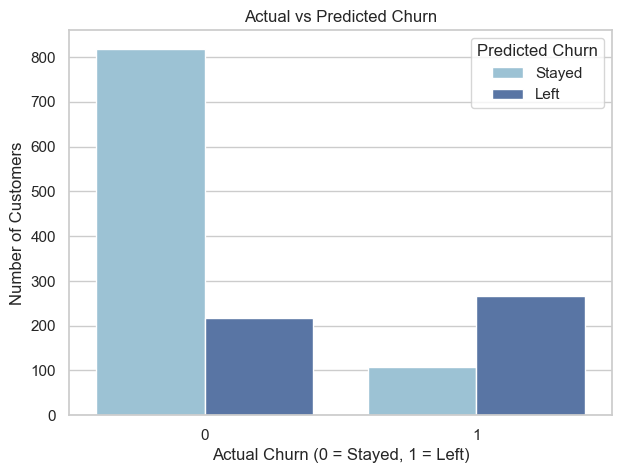

Number of missed churners (False Negatives): 108
       seniorcitizen      tenure  monthlycharges  totalcharges  actual_churn  \
count     108.000000  108.000000      108.000000    108.000000         108.0   
mean        0.129630   28.240741       66.504167   2379.406944           1.0   
std         0.337461   22.605462       31.350497   2364.002380           0.0   
min         0.000000    1.000000       18.950000     19.400000           1.0   
25%         0.000000    6.750000       48.850000    224.337500           1.0   
50%         0.000000   24.500000       66.375000   1710.300000           1.0   
75%         0.000000   48.000000       95.312500   3765.062500           1.0   
max         1.000000   72.000000      115.650000   7968.850000           1.0   

       predicted_churn  churn_probability  
count            108.0         108.000000  
mean               0.0           0.270434  
std                0.0           0.143669  
min                0.0           0.003578  
25%       

In [263]:
# Postdictive analysis compares predicted churn with actual churn.
# This helps identify which customers were correctly or incorrectly flagged,
# providing insights into model strengths and weaknesses.

# Create a dataframe to compare predictions against actual outcomes
postdict_df = X_test.copy()
postdict_df["actual_churn"] = y_test.values
postdict_df["predicted_churn"] = y_pred          
postdict_df["churn_probability"] = y_prob

# 1. VISUAL SUMMARY: ACTUAL VS PREDICTED CHURN
# This chart shows how many customers were correctly or incorrectly predicted.

plt.figure(figsize=(7,5))

# Count of customers by actual vs predicted churn
sns.countplot(
    x='actual_churn', 
    hue='predicted_churn', 
    data=postdict_df,
    palette=['#92c5de', '#4c72b0'])

plt.title("Actual vs Predicted Churn")
plt.xlabel("Actual Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Customers")
plt.legend(title="Predicted Churn", labels=['Stayed', 'Left'])
plt.show()


# 2. MISSED CHURNERS (FALSE NEGATIVES)
# These are customers who churned but were not flagged by the model.
# This is the most costly type of error in terms of revenue loss.

false_negatives = postdict_df[
    (postdict_df["actual_churn"] == 1) &
    (postdict_df["predicted_churn"] == 0)]

print(f"Number of missed churners (False Negatives): {len(false_negatives)}")

# Inspect their average behaviour
print(false_negatives.describe())

# Interpretation:
# Missed churners often show moderate tenure or average monthly charges.
# The model finds it challenging to identify customers who do not show extreme behaviour.
# These customers may require closer monitoring and targeted engagement strategies.

# 3. FALSE POSITIVES 
# Customers predicted to churn but who did not leave.
# While not as costly as missed churners, these customers may receive unnecessary retention offers.

false_positives = postdict_df[
    (postdict_df["actual_churn"] == 0) &
    (postdict_df["predicted_churn"] == 1)]

print(f"Number of false positives: {len(false_positives)}")

# Inspect their behaviour
print(false_positives.describe())

# Interpretation:
# Some loyal customers display behaviours similar to churners.
# Retention campaigns should be targeted carefully to avoid unnecessary cost.

# 4. CORRECTLY IDENTIFIED CHURNERS (TRUE POSITIVES) 
true_positives = postdict_df[
    (postdict_df["actual_churn"] == 1) &
    (postdict_df["predicted_churn"] == 1)]

print(f"Correctly identified churners: {len(true_positives)}")

# Inspect their average behaviour
print(true_positives.describe())

# Interpretation:
# The model successfully identifies high-risk customers,
# enabling proactive interventions like customised offers or improved support.

## __10. Business Recommendations__

### __Executive Summary__

Implementing these targeted strategies can significantly reduce customer churn, improve retention of high-value customers, and increase overall Customer Lifetime Value (CLV). Data-driven interventions focused on contract type, tenure, pricing, and service experience will protect revenue while strengthening customer loyalty.

### __Business Recommendations for Customer Retention__

#### 1. Transition Month-to-Month Customers to Long-Term Contracts

Insight: Month-to-month contract status is the strongest predictor of churn.

Action: Launch a “Loyalty Upgrade” campaign offering a 5–10% discount or free service upgrade (e.g., extra data or streaming) for switching to 1- or 2-year contracts.

Rationale: The cost of incentivising customers is substantially lower than replacing lost revenue.


#### 2. Implement a “Price-Match” or Plan Right-Sizing Programme

Insight: High monthly charges correlate with churn, particularly for non-contract customers.

Action: Identify customers with >70% predicted churn risk and offer customised plans that better match their needs.

Rationale: Adjusting pricing proactively retains customers while maintaining long-term revenue.


#### 3. Proactive Technical Support for Premium Services

Insight: Although Fibre-optic customers pay a premium for faster internet, they are leaving the service at higher rates than DSL customers. This indicates potential issues with service satisfaction or price sensitivity among high-value users

Action: Provide enhanced priority support, loyalty perks, quarterly service health checks, and bundle features like “Online Security” or “Tech Support” to strengthen engagement.

Rationale: Enhancing service experience “sticks” premium users to the platform and reduces churn.


#### 4. Target the Early Tenure Danger Zone

Insight: Customers are most likely to leave within the first 6–12 months.

Action: Launch a “First Anniversary” programme with incentives or thank-you bonuses at 6 and 12 months. Improve onboarding and early engagement communications.

Rationale: Early engagement prevents customers from entering the high-risk churn pool.


#### 5. Deploy an Early-Warning System (EWS) Using Predictive Scores

Insight: The XGBoost model identifies high-risk customers with high accuracy.

Action: Integrate churn probability scores into the CRM. Trigger alerts for customer success teams when scores exceed 0.65, prompting proactive outreach and personalised retention offers.

Rationale: Moving from reactive to proactive retention maximises the impact of interventions and strengthens customer loyalty.

### __Closing Statement__

Shifting from a reactive ‘save-at-cancellation’ approach to a data-driven retention model ensures that high-risk customers are identified early. This strategy reduces churn, protects revenue, and increases Customer Lifetime Value, aligning with both operational efficiency and long-term growth objectives.